# Introduction

# Objective

# Business Impact

# data description

# 1. import Libraries

In [1]:
# To read data and to operation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split
from sklearn.model_selection import train_test_split, GridSearchCV

# object to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# metric to evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# to convert if files
import pickle
import json

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load data

In [2]:
# read data by using pandas read_csv function
df = pd.read_csv("healthcare_claims_large.csv")
df.tail(10)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
4990,C04991,62,Male,P005,D003,PR005,1477,38119,TN,Standard,Approved
4991,C04992,56,Female,P004,D005,PR001,21094,32038,UP,Standard,Approved
4992,C04993,68,Male,P005,D005,PR001,40302,15100,WB,Standard,Approved
4993,C04994,26,Male,P001,D004,PR002,34526,44794,AP,Standard,Approved
4994,C04995,40,Male,P001,D005,PR002,45315,50121,RJ,Premium,Approved
4995,C04996,29,Female,P003,D003,PR003,18181,11143,AP,Standard,Denied
4996,C04997,79,Female,P001,D002,PR003,10670,61376,AP,Basic,Approved
4997,C04998,57,Male,P005,D005,PR005,7897,85144,DL,Premium,Approved
4998,C04999,71,Female,P005,D003,PR005,40140,89365,WB,Basic,Approved
4999,C05000,24,Female,P001,D003,PR002,30583,84016,WB,Standard,Approved


# step 3. Exploratory data analysis(EDA)

In [5]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Claim_ID          5000 non-null   object
 1   Patient_Age       5000 non-null   int64 
 2   Gender            5000 non-null   object
 3   Provider          5000 non-null   object
 4   Diagnosis         5000 non-null   object
 5   Procedure         5000 non-null   object
 6   Claim_Amount      5000 non-null   int64 
 7   Hospital_Charges  5000 non-null   int64 
 8   State             5000 non-null   object
 9   Policy_Type       5000 non-null   object
 10  Claim_Status      5000 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.8+ KB


In [3]:
# summary statistics
print(df.describe())

"""age :
        1. mean - 53
        2. min  - 18
        3. max  - 89
"""

       Patient_Age  Claim_Amount  Hospital_Charges
count  5000.000000   5000.000000       5000.000000
mean     53.364000  25069.279800      50926.208000
std      20.680277  14220.892016      28662.563987
min      18.000000    501.000000       2002.000000
25%      35.000000  12908.500000      26281.250000
50%      53.000000  25028.000000      50515.500000
75%      71.000000  37486.500000      76140.500000
max      89.000000  49989.000000      99984.000000


'age :\n        1. mean - 53\n        2. min  - 18\n        3. max  - 89\n'

In [7]:
# count of missing values
df.isnull().sum()

Claim_ID            0
Patient_Age         0
Gender              0
Provider            0
Diagnosis           0
Procedure           0
Claim_Amount        0
Hospital_Charges    0
State               0
Policy_Type         0
Claim_Status        0
dtype: int64

In [4]:
# check duplicate entries (rows)
df.duplicated().sum()

# drop duplicate
df.drop_duplicates(inplace = True)

In [5]:
df.columns

Index(['Claim_ID', 'Patient_Age', 'Gender', 'Provider', 'Diagnosis',
       'Procedure', 'Claim_Amount', 'Hospital_Charges', 'State', 'Policy_Type',
       'Claim_Status'],
      dtype='object')

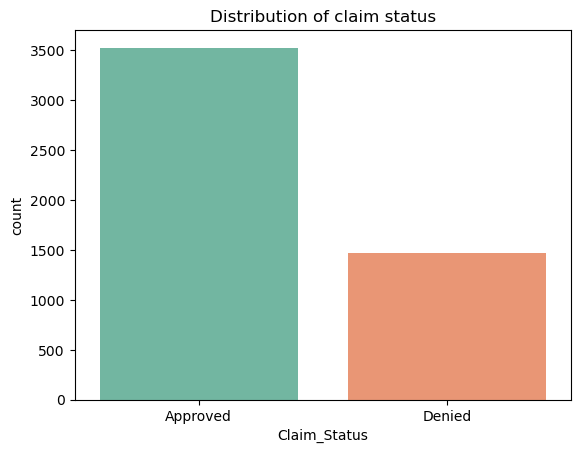

In [6]:
# check target variable distribution
# classification probles means target in categorical var (countplot)

"""base on this visualization we understand our data is imbalance
1. we want to balance this data set"""

import seaborn as sns

sns.countplot(x = df['Claim_Status'], palette = "Set2")
plt.title("Distribution of claim status")
plt.show()



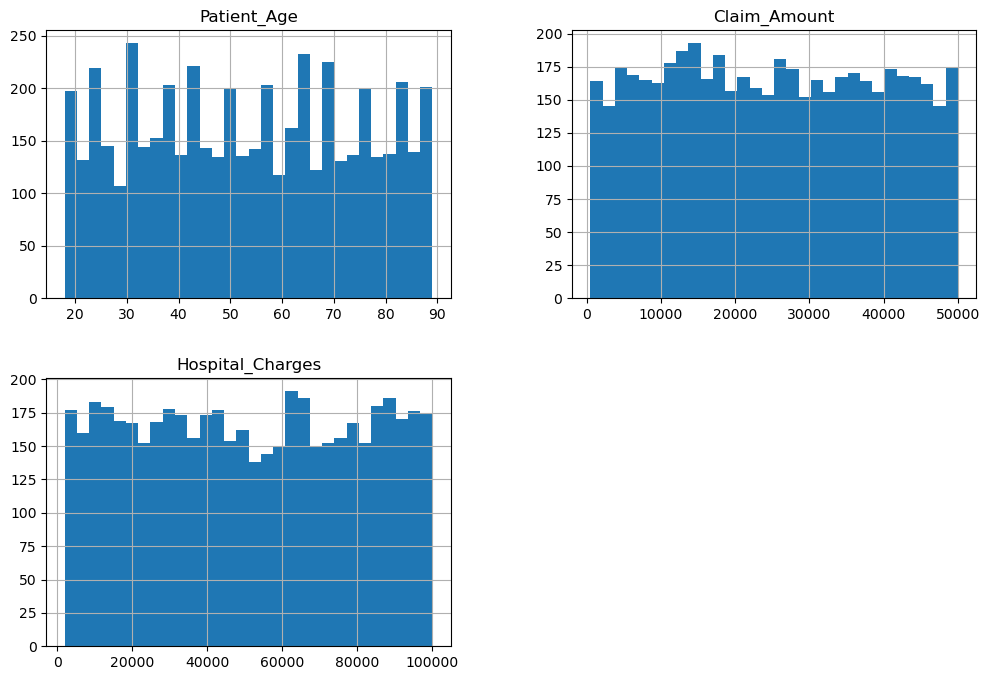

In [7]:
# features distribution
# plot on only continues columns
df.hist(figsize = (12,8), bins = 30)
plt.show()

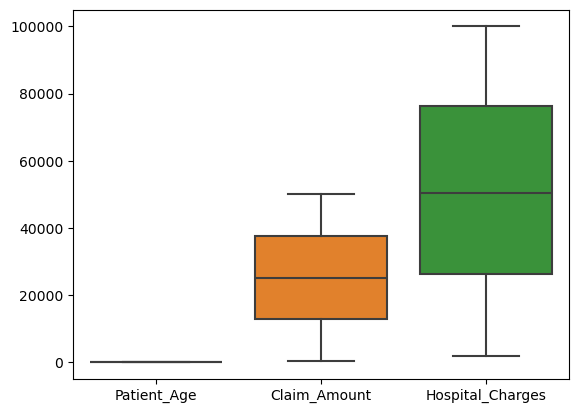

In [8]:
# Boxplot for outlier detection

sns.boxplot(data = df)
plt.show()

In [ ]:
# correlation heatmap
# for correlation matrix we want column is numerice

In [10]:
df.head()

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,P003,D002,PR003,30785,3732,RJ,Basic,Approved
1,C00002,78,Male,P002,D005,PR005,23057,4942,AP,Standard,Approved
2,C00003,66,Female,P005,D003,PR002,43002,61853,DL,Standard,Approved
3,C00004,69,Female,P004,D002,PR004,14719,99084,GJ,Standard,Approved
4,C00005,19,Female,P001,D001,PR004,44506,11429,UP,Premium,Approved


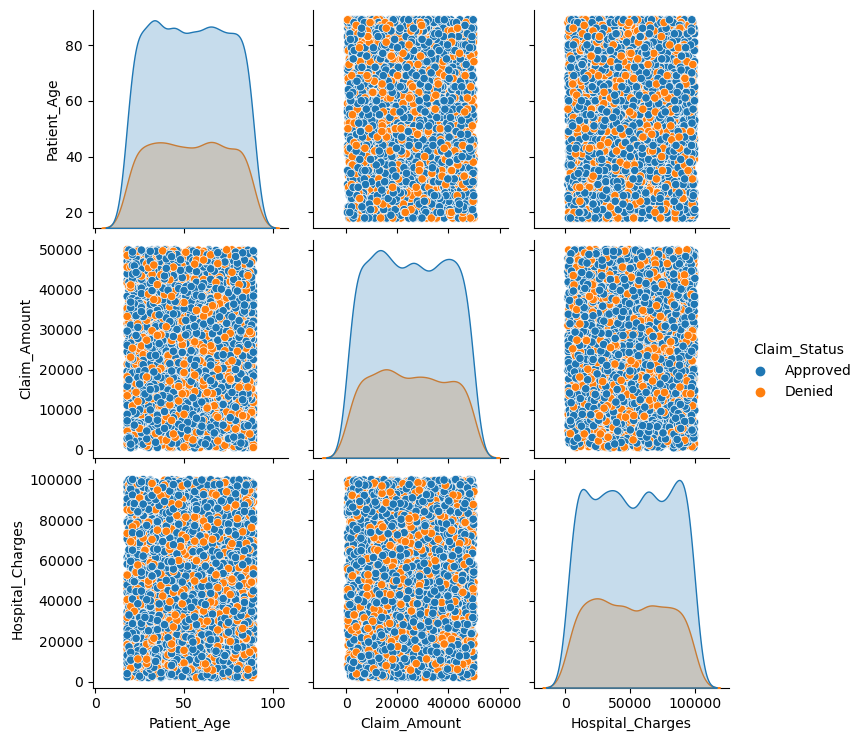

In [9]:
# Pairplot for relational analysis
# with target columns ()
# hue - we plot base on target column

sns.pairplot(df,hue = "Claim_Status", diag_kind = "kde" )
plt.show()

In [51]:
# check skewness

# df.skew()

# step 4. Feature Engineering

In [11]:
df.head(1)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,P003,D002,PR003,30785,3732,RJ,Basic,Approved


In [12]:
df['Provider'].value_counts()   # AP - 10, TN - 9
df['Diagnosis'].value_counts()
df['Procedure'].value_counts()
df['State'].value_counts()

State
AP    551
TN    517
WB    516
GJ    504
DL    502
KA    500
RJ    491
UP    488
MH    469
MP    462
Name: count, dtype: int64

In [13]:
# Encode categorical variable
# first we convert only labels data

from sklearn.preprocessing import LabelEncoder

# syntax
# var = le.fit_transform(df[columns])
le = LabelEncoder()

categorical_columns = ["Provider",'Diagnosis','Procedure','State']

for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

In [14]:
df.head()

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,Male,2,1,2,30785,3732,6,Basic,Approved
1,C00002,78,Male,1,4,4,23057,4942,0,Standard,Approved
2,C00003,66,Female,4,2,1,43002,61853,1,Standard,Approved
3,C00004,69,Female,3,1,3,14719,99084,2,Standard,Approved
4,C00005,19,Female,0,0,3,44506,11429,8,Premium,Approved


In [15]:
# convert Target and gender to binary
df["Gender"].value_counts()
df["Claim_Status"].value_counts()

Claim_Status
Approved    3528
Denied      1472
Name: count, dtype: int64

In [16]:
# convert target columns
df["Claim_Status"] = df["Claim_Status"].map({'Approved':1,'Denied':0})

# convert gender columns
df["Gender"] = df["Gender"].map({'Male':1,'Female':0})

In [17]:
df.head(1)

,Claim_ID,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,C00001,72,1,2,1,2,30785,3732,6,Basic,1


In [17]:
# df["Policy_Type"] .value_counts()

# also convert policy type columns
df["Policy_Type"]  = le.fit_transform(df["Policy_Type"] )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Claim_ID          5000 non-null   object
 1   Patient_Age       5000 non-null   int64 
 2   Gender            5000 non-null   int64 
 3   Provider          5000 non-null   int32 
 4   Diagnosis         5000 non-null   int32 
 5   Procedure         5000 non-null   int32 
 6   Claim_Amount      5000 non-null   int64 
 7   Hospital_Charges  5000 non-null   int64 
 8   State             5000 non-null   int32 
 9   Policy_Type       5000 non-null   int32 
 10  Claim_Status      5000 non-null   int64 
dtypes: int32(5), int64(5), object(1)
memory usage: 332.2+ KB


# Why drop claim_id

In [19]:
df.drop("Claim_ID", axis = 1, inplace = True)

In [20]:
df.head(1)

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,72,1,2,1,2,30785,3732,6,0,1


In [21]:
# standardize Numerical feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_feature = ["Patient_Age",'Claim_Amount','Hospital_Charges']
df[numeric_feature] = scaler.fit_transform(df[numeric_feature])

In [65]:
df.head(1)

,Patient_Age,Gender,Provider,Diagnosis,Procedure,Claim_Amount,Hospital_Charges,State,Policy_Type,Claim_Status
0,0.901239,1,2,1,2,0.401964,-1.64671,6,0,1


In [22]:
df.columns

Index(['Patient_Age', 'Gender', 'Provider', 'Diagnosis', 'Procedure',
       'Claim_Amount', 'Hospital_Charges', 'State', 'Policy_Type',
       'Claim_Status'],
      dtype='object')

In [25]:
df1 = df[['Patient_Age','Gender','State','Claim_Amount','Claim_Status']]

## our data is imbalance so we applying SMOTE  technique to balance our data

In [ ]:
# 1. random oversampling
# 2. random undersampling
# 3. SMOTE (synthetic minority oversampling technique)

In [23]:
from imblearn.over_sampling import SMOTE

In [26]:
# seperated feature and target

x = df1.drop("Claim_Status", axis = 1)
y = df1['Claim_Status']

In [27]:
# apply smote to balance classes

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [28]:
# CONVERT IN DATAFRAM
df1 = pd.DataFrame(x_resampled, columns = x.columns)
df1["target"] = y_resampled

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient_Age   7056 non-null   float64
 1   Gender        7056 non-null   int64  
 2   State         7056 non-null   int32  
 3   Claim_Amount  7056 non-null   float64
 4   target        7056 non-null   int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 248.2 KB


### check tarted variable distibution after balance

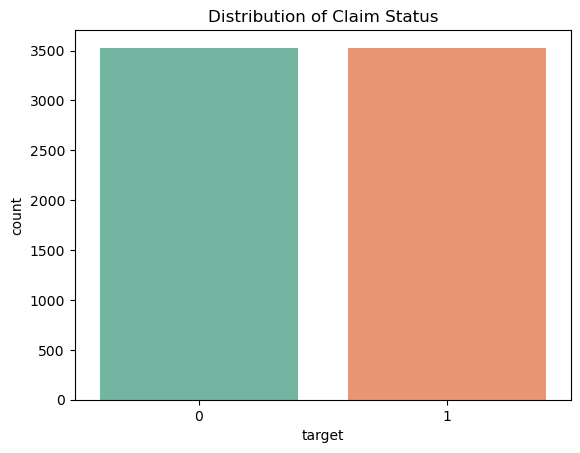

In [30]:
sns.countplot(x=df1["target"],palette = "Set2")
plt.title("Distribution of Claim Status")
plt.show()

In [ ]:
# 1. classification or regression
# 2 .high dimension(more columns) svm, naive bayes
# 3. low dimension(logi., random, knn, decision)

#### step6 split data for training & testing

In [31]:
# df1

x = df1.drop("target",axis = 1)
y = df1["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#### step 7:Train Multiple ML models

In [32]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [33]:
# evaluation on testing data
y_pred_test = log_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test, y_test)
print(f"accuracy of testing data :",accuracy_test)

# evaluation of training dataset
y_pred_train = log_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of trainig data :",accuracy_train)

accuracy of testing data : 0.495042492917847
accuracy of trainig data : 0.5161233167965982


##### random forest

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
# evaluation on testing data
y_pred_test = rf_model.predict(x_test)

accuracy_test = accuracy_score(y_pred_test, y_test)
print(f"accuracy of testing data :",accuracy_test)

# evaluation of training dataset
y_pred_train = rf_model.predict(x_train)

accuracy_train = accuracy_score(y_pred_train,y_train)
print(f"accuracy of trainig data :",accuracy_train)

accuracy of testing data : 0.6628895184135978
accuracy of trainig data : 0.9998228206945429


In [ ]:
# by using random forest model we get best accuracy but
# our model is overfitted
# overfitted - best accuracy on training data 
             # bad accuracy on testing data

# accuracy of testing data : 0.7046742209631728
# accuracy of trainig data : 1.0

# step 8: Hyperparamter tunning (GridSearchCv)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
rf_model = RandomForestClassifier()

para = {"criterion" : ['gini','entropy'],
    "max_depth":np.arange(3,20),
    "min_samples_split":np.arange(3,20),
    "min_samples_leaf":np.arange(2,10),
       "n_estimators":np.arange(50,150)}

random_search = RandomizedSearchCV(rf_model, para, cv = 5)
random_search.fit(x_train,y_train)
best_model = random_search.best_estimator_

In [39]:
# evaluation of testing
y_pred_test = best_model.predict(x_test)

accuray_test = accuracy_score(y_pred_test, y_test)
print("testing accurary after hyp. :",accuracy_test)

# evaluation of training dataset
y_pred_train = best_model.predict(x_train)

accuray_train = accuracy_score(y_pred_train, y_train)
print("training accuray after hyp. :",accuray_train)

testing accurary after hyp. : 0.6628895184135978
training accuray after hyp. : 0.8559532246633593


# support vector machine

In [40]:
from sklearn.svm import SVC

In [41]:
# model training
svm_model = SVC(kernel = "rbf")
svm_model.fit(x_train, y_train)

SVC()

In [42]:
# evaluaion on testing dataset
y_pred_test = svm_model.predict(x_test)

accuray_test = accuracy_score(y_pred_test, y_test)
print("testing accurary after hyp. :",accuracy_test)

# evaluation of training dataset
y_pred_train = svm_model.predict(x_train)

accuray_train = accuracy_score(y_pred_train, y_train)
print("training accuray after hyp. :",accuray_train)

testing accurary after hyp. : 0.6628895184135978
training accuray after hyp. : 0.5292345854004252


#### step 9: save model as pickle & json

###### save the model in pickle

In [43]:
with open("model.pkl",'wb') as f:
    pickle.dump(best_model, f)

#### save model parameter

In [44]:
model_json

NameError: name 'model_json' is not defined

In [97]:
model_json = {"max_depth":15, "min_samples_leaf":4, "min_samples_split":8,"n_estimators":95}

with open("model_config.json",'w') as f:
    json.dump(model_json,f)

In [99]:
with open("model_config.json",'r') as f:
    data = json.load(f)

print(data)

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 95}


In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset (Use your actual dataset here)
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'State': ['MH', 'DL', 'KA', 'MH']
})

# Initialize encoders
gender_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit encoders on the dataset
data['Gender'] = gender_encoder.fit_transform(data['Gender'])
data['State'] = state_encoder.fit_transform(data['State'])

# Save encoders as a dictionary
encoder_dict = {'Gender': gender_encoder, 'State': state_encoder}

# Save as pickle file
with open("encoder.pkl", "wb") as file:
    pickle.dump(encoder_dict, file)

print("Encoder saved as encoder.pkl ✅")


Encoder saved as encoder.pkl ✅


In [6]:
df.columns

Index(['Claim_ID', 'Patient_Age', 'Gender', 'Provider', 'Diagnosis',
       'Procedure', 'Claim_Amount', 'Hospital_Charges', 'State', 'Policy_Type',
       'Claim_Status'],
      dtype='object')

In [9]:
df = df[['Patient_Age', 'Gender', 'State', 'Claim_Amount', 'Claim_Status']]  # Only keep required columns
X = df.drop(columns=['Claim_Status'])
y = df['Claim_Status']

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Save new model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


ValueError: could not convert string to float: 'Male'